## Collect and Visualize NWM Forecasts

**Authors**: Anthony Castronova (acastronova@cuahsi.org), Irene Garousi-Nejad (igarousi@cuahsi.org)  <br>
**Last updated**: 

This notebook demonstrates how to collect and visualize NWM forecast data. All data used in this notebook are publicly acessible via Amazon AWS. Streamflow data is collected from operational NWM medium-range forecasts (https://console.cloud.google.com/storage/browser/national-water-model/).

This work was funded by:

 <img src="https://www.hydroshare.org/resource/dc269e23ff494a06b7372bc6034a5de2/data/contents/v3-SNOW/logo-img/CUAHSI-4-color-logo_with_URL.png" width="300" height="300" style="padding-right:50px"> <img src="https://www.hydroshare.org/resource/dc269e23ff494a06b7372bc6034a5de2/data/contents/v3-SNOW/logo-img/CIROHLogo_200x200.png" width="100" height="20">    

In [2]:
import os
os.environ['USE_PYGEOS'] = '0'

import sys
import zarr
import numpy
import xarray
import rioxarray
import geopandas
import numpy as np
import pandas as pd
from typing import Dict
from pathlib import Path
from scipy import interpolate
import matplotlib.pyplot as plt
from dask.distributed import Client
from datetime import datetime, timedelta
from geocube.api.core import make_geocube

# Import a utility library for collecting medium-range forecast data.
import forecast

In [3]:
# use a try accept loop so we only instantiate the client
# if it doesn't already exist.
try:
    print(client.dashboard_link)
except:    
    # The client should be customized to your workstation resources.
    # Machine size -> 52 GB, 16 CPU
    #client = Client()
    client = Client(n_workers=6, memory_limit='4GB') # per worker
    print(client.dashboard_link)

/user/castronova/proxy/8787/status


Define a feature of interest using an NHD+ Reach ID

In [4]:
# NHD+ feature id of interest
nhd_feature_id=4966269

Collect streamflow for this `reach_id` using the `forecast.py` forecast utility.

In [6]:
%%time

destination_folder = ".cache"
forecast_mode = 'medium_range_blend'
init_times = [0] 

# collect data for the reach above for multiple days
start_date = datetime(2024, 4, 1)
end_date = datetime(2024, 4, 3)
delta = timedelta(days=1)
dats = {}
while start_date <= end_date:
    ds = mediumrange.get_streamflow_for_reaches(start_date, init_times=init_times, reach_ids=[nhd_feature_id],
                                                forecast_mode=forecast_mode,
                                                merge_files=True,
                                                merge_format='Zarr',
                                                clean_on_success=False,
                                                )
    start_date += delta
    dats.update(ds)

+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t00z_medium_range_blend.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 1.845954418182373
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t00z_medium_range_blend.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.320573091506958
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t00z_medium_range_blend.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3409256935119629
CPU times: user 2.3 s, sys: 274 ms, total: 2.57 s
Wall time: 2.51 s


In [7]:
list(dats.keys())

['20240401-medium_range_blend-t0z',
 '20240402-medium_range_blend-t0z',
 '20240403-medium_range_blend-t0z']

plotting 20240401-medium_range_blend-t0z
plotting 20240402-medium_range_blend-t0z
plotting 20240403-medium_range_blend-t0z


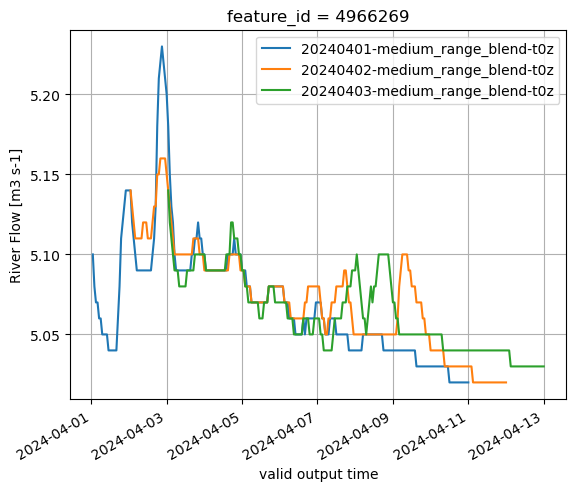

In [14]:
fig, ax = plt.subplots(1,1)

for k, dat in dats.items():
    print(f'plotting {k}')
    dat.streamflow.plot(ax=ax, label=k);
plt.grid()
plt.legend()

In [16]:
%%time

#bucket_name = "national-water-model"
#wildcard = "nwm.t00z*channel_rt*"

destination_folder = ".cache"
forecast_mode = 'short_range'
init_times = range(0, 24)
# collect data for the reach above for multiple days
start_date = datetime(2024, 4, 1)
end_date = datetime(2024, 4, 4)
delta = timedelta(days=1)
dats = {}
while start_date <= end_date:
    ds = mediumrange.get_streamflow_for_reaches(start_date, init_times=init_times, reach_ids=[nhd_feature_id],
                                                forecast_mode=forecast_mode,
                                                merge_files=True,
                                                merge_format='Zarr',
                                                clean_on_success=False,
                                                )
    start_date += delta
    dats.update(ds)

+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t00z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3213841915130615
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t01z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3264756202697754
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t02z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31821131706237793
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t03z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3135347366333008
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t04z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3173654079437256
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t05z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32375073432922363
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t06z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3169670104980469
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t07z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3422539234161377
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t08z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3248302936553955
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t09z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3265855312347412
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t10z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3178558349609375
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t11z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.320770263671875
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t12z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32021427154541016
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t13z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32285523414611816
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t14z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31522607803344727
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t15z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31812334060668945
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t16z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31844282150268555
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t17z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3217172622680664
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t18z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31606578826904297
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t19z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31975698471069336
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t20z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3138270378112793
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t21z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3196680545806885
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t22z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3155691623687744
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240401/t23z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3187248706817627
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t00z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3191866874694824
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t01z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3348884582519531
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t02z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.314725399017334
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t03z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33973026275634766
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t04z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31884336471557617
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t05z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3356471061706543
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t06z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31708574295043945
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t07z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31337547302246094
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t08z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33008289337158203
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t09z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32038307189941406
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t10z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31815505027770996
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t11z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32155442237854004
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t12z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3224332332611084
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t13z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3196852207183838
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t14z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3241143226623535
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t15z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33092331886291504
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t16z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3273048400878906
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t17z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32497334480285645
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t18z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3299870491027832
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t19z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32219672203063965
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t20z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32942938804626465
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t21z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33109259605407715
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t22z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33101773262023926
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240402/t23z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33539795875549316
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t00z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33722853660583496
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t01z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3236827850341797
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t02z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3182542324066162
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t03z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3237316608428955
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t04z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3121047019958496
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t05z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31836462020874023
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t06z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31952762603759766
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t07z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3308579921722412
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t08z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3214447498321533
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t09z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32660937309265137
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t10z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32494473457336426
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t11z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31613802909851074
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t12z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3328981399536133
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t13z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3288552761077881
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t14z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3286745548248291
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t15z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33504462242126465
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t16z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32110166549682617
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t17z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.33191370964050293
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t18z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31801843643188477
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t19z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3149130344390869
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t20z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3145935535430908
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t21z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32258033752441406
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t22z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3249475955963135
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240403/t23z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3220856189727783
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t00z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31696224212646484
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t01z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.321148157119751
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t02z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3203418254852295
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t03z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3237018585205078
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t04z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32510876655578613
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t05z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3207437992095947
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t06z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32140254974365234
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t07z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3311142921447754
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t08z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3219897747039795
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t09z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3161923885345459
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t10z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3386249542236328
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t11z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.30715370178222656
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t12z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.317119836807251
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t13z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3210439682006836
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t14z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3201332092285156
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t15z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3246734142303467
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t16z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32594943046569824
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t17z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3179135322570801
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t18z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3192441463470459
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t19z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3332784175872803
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t20z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32409024238586426
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t21z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.3226349353790283
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t22z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.32456326484680176
+ Collecting streamflow data...
Data already exists at .cache/nwm.20240404/t23z_short_range.zarr, skipping download
+ Loading single-file streamflow data...

/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


Elapsed time: 0.31978869438171387
CPU times: user 26 s, sys: 4.58 s, total: 30.6 s
Wall time: 31.1 s


In [17]:
list(dats.keys())

['20240401-short_range-t0z',
 '20240401-short_range-t1z',
 '20240401-short_range-t2z',
 '20240401-short_range-t3z',
 '20240401-short_range-t4z',
 '20240401-short_range-t5z',
 '20240401-short_range-t6z',
 '20240401-short_range-t7z',
 '20240401-short_range-t8z',
 '20240401-short_range-t9z',
 '20240401-short_range-t10z',
 '20240401-short_range-t11z',
 '20240401-short_range-t12z',
 '20240401-short_range-t13z',
 '20240401-short_range-t14z',
 '20240401-short_range-t15z',
 '20240401-short_range-t16z',
 '20240401-short_range-t17z',
 '20240401-short_range-t18z',
 '20240401-short_range-t19z',
 '20240401-short_range-t20z',
 '20240401-short_range-t21z',
 '20240401-short_range-t22z',
 '20240401-short_range-t23z',
 '20240402-short_range-t0z',
 '20240402-short_range-t1z',
 '20240402-short_range-t2z',
 '20240402-short_range-t3z',
 '20240402-short_range-t4z',
 '20240402-short_range-t5z',
 '20240402-short_range-t6z',
 '20240402-short_range-t7z',
 '20240402-short_range-t8z',
 '20240402-short_range-t9z',


array([[1.        , 1.        , 1.        , 1.        ],
       [0.95755479, 0.95755479, 0.95755479, 1.        ],
       [0.90120723, 0.90120723, 0.90120723, 1.        ],
       [0.83289504, 0.83289504, 0.83289504, 1.        ],
       [0.75021915, 0.75021915, 0.75021915, 1.        ],
       [0.64341407, 0.64341407, 0.64341407, 1.        ],
       [0.53871588, 0.53871588, 0.53871588, 1.        ],
       [0.44032295, 0.44032295, 0.44032295, 1.        ],
       [0.34288351, 0.34288351, 0.34288351, 1.        ],
       [0.22329873, 0.22329873, 0.22329873, 1.        ],
       [0.10469819, 0.10469819, 0.10469819, 1.        ],
       [0.        , 0.        , 0.        , 1.        ]])

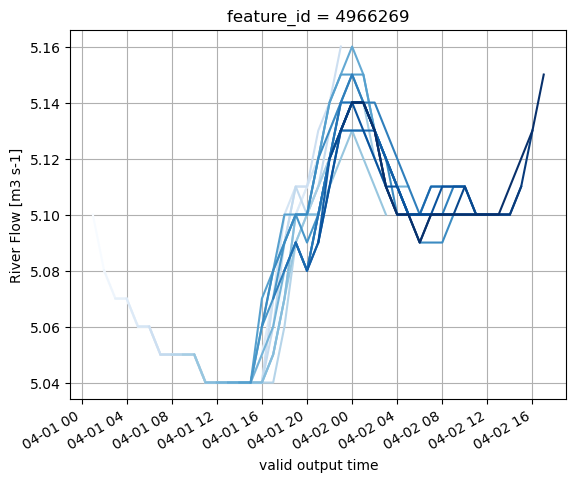

In [38]:
from matplotlib import colormaps, cm
import numpy as np

grey_cm = colormaps['Blues']
colors = grey_cm(np.linspace(0, 1, 24))

fig, ax = plt.subplots(1,1)

i = 0
for key, dat in dats.items():
    
    dat.streamflow.plot(ax=ax, color=colors[i]);

    i += 1
    if i > 23:
        break
plt.grid()

In [54]:
ds = xarray.open_dataset('/home/jovyan/Desktop/notebooks/nwm/fim-hand/.cache/nwm.20240420/out.nc')


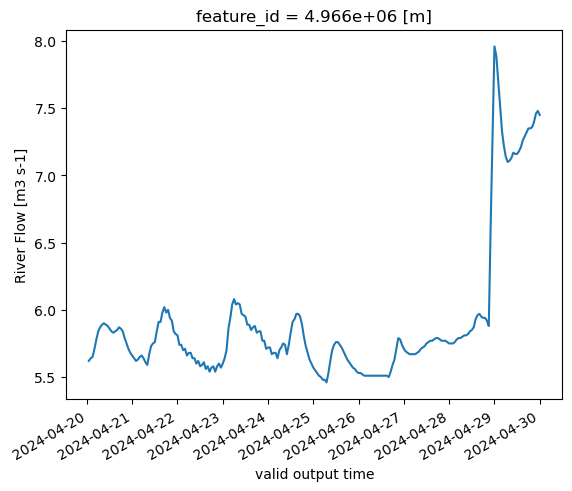

In [58]:
ds.sel(feature_id=nhd_feature_id).streamflow.plot()

In [40]:
ds.sel(feature_id = nhd_feature_id)

KeyError: "no index found for coordinate 'feature_id'"

In [25]:
#cdo = Cdo()
output_file = str(Path(f'{destination_folder}/{prefix}.nc'))
input_files = [str(f) for f in Path('.cache/nwm.20240420/medium_range_mem1').glob('*.nc')]


In [17]:
input_files

'.cache/nwm.20240420/medium_range_mem1/*'

In [19]:
!cdo mergetime -w .cache/nwm.20240420/medium_range_mem1/*.nc .cache/nwm.20240420/medium_range_mem1.nc

cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >latitude<
cdi  warning (cdfScanVarAttr): NetCDF: Variable not found - >longitude<

In [ ]:
%%time

#!mamba install cdo python-cdo
from cdo import Cdo
cdo = Cdo()
cdo.merge(input=input_files, output=output_file)

In [49]:
%%time
_ds = xarray.open_mfdataset(paths,
                        engine='h5netcdf',
                        parallel=True)


CPU times: user 32.2 s, sys: 7.57 s, total: 39.7 s
Wall time: 39.8 s


In [ ]:
%%time
_ds.to_netcdf(output_file)

In [ ]:
# hypothetical streamflow (cms).
# This can be replaced with a flow value gathered by a source of your choice
cms = 85

Use the streamflow defined above to interpolate river stage from a rating curve for all hydroids that exist within this NHD+ reach. 

In [ ]:
def interpolate_y(df: pd.DataFrame,
                  x_column: str,
                  y_column: str,
                  x_value: float) -> float:
    """
    Performs 1D interpolation on two columns of a Dataframe.

    Parameters
    ==========
    df: pandas.DataFrame
        DataFrame containing data that will be used in the interpolation.
    x_column: str
        Name of the column that represents the X-axis data.
    y_column: str
        Name of the column that represents the Y-axis data.
    x_value: float
        Numeric X-axis value for which to interpolate Y-axis data. Returns 
        -9999 if the interpolation fails to resolve.

    Returns
    =======
    y_value: float
        Numeric Y-axis value corresponding to the input X-axis value.

    """
    # Sort the DataFrame by the 'x' column to ensure interpolation works correctly
    df_sorted = df.sort_values(by=x_column)
    
    # Check if the x_value is within the range of the DataFrame
    if x_value < df_sorted[x_column].min() or x_value > df_sorted[x_column].max():
        return -9999  # x_value is out of range, cannot interpolate
    
    # Perform linear interpolation
    f = interpolate.interp1d(df_sorted[x_column], df_sorted[y_column], kind='linear')
    
    # Return the interpolated y value for the given x value
    return f(x_value)

def compute_stage(df: pd.DataFrame,
                  hydro_id: int,
                  flow_cms: float) -> Dict[int, float]:
    """
    Computes river stage from a rating curve given streamflow in cfs.

    Parameters
    ==========
    df: pandas.DataFrame
        DataFrame containing the stage and discharge values of the rating curve.
        This must contain the following columns: HydroID, stage, discharge_cms.
    hydro_id: int
        Identifier for the reach for which to compute stage.
    flow_cms: float
        Streamflow to convert into river stage.

    Returns
    =======
    Dict [int, float]
        A dictionary containing computed stage and its associated hydroid

    """

    
    # look up rating curve for this hydroid
    rating_curve = df.loc[df.HydroID == hydro_id, ['stage', 'discharge_cms']]

    # interpolate using the provided flow rate
    interpolated_stage = interpolate_y(rating_curve, 'discharge_cms', 'stage', flow_cms) 

    return {hydro_id: float(interpolated_stage)}

def get_stage_for_all_hydroids_in_reach(nhd_feature_id: int,
                                        flow_cms: float,
                                        hydrotable: Path = Path('./hydroTable_0.csv')) -> Dict[int, float]:
    """
    Retrieves stage for all NWM HydroIDs given an NHD reach and input streamflow.
    The stage is computed using FIM rating curves.

    Parameters
    ==========
    nhd_feature_id: int
        NHD feature identifier.
    flow_cms: float
        Streamflow for the reach in cubic meters per second
    hydrotable: pathlib.Path
        Path to the FIM hydrotable.csv file containing rating curve data.

    Returns
    =======
    Dict [int, float]
        Dictionary containing one or more NWM hydro identifiers and 
        their corresponding stages.

    """
    
    # load hydrotable_0
    # we don't need all of the columns in this csv
    hydro_df = pd.read_csv(hydrotable,
                           usecols=['HydroID', 'NextDownID', 'feature_id',
                                    'stage', 'discharge_cms'])
    
    # select features that match nhd_feature_id
    d = hydro_df.loc[hydro_df.feature_id==nhd_feature_id]
    
    # get unique combos of HydroID and NextDownID 
    hydro_ids = np.unique(d.HydroID)
    
    interpolated_stages = {}
    for hydro_id in hydro_ids:  
        interpolated_stages.update(compute_stage(d, hydro_id, flow_cms))
        
    # return interpolated stage
    return interpolated_stages


In [ ]:
stage_dict = get_stage_for_all_hydroids_in_reach(nhd_feature_id, cms)

In [ ]:
stage_dict

Load the precomputed HAND raster that was obtained from AWS.

In [ ]:
xds = rioxarray.open_rasterio(Path('./rem_zeroed_masked_0.tif'),
                              masked=True).squeeze().drop_vars('band').to_dataset(name='hand')
xds

Make a copy of the 'hand' variable to the 'stage' variable. This will be used to compute the flood inundation map later on. The dataset will now have both `hand` and `stage` variables for all (x,y) locations.

In [ ]:
xds['stage'] = xds.hand.copy(deep=True)
xds

Read watershed geometries and set stage values from the `stage_dict` defined above, and remove all other geometries. The end product will be a geodataframe containing the geometries for each `hydroid` in our area of interest and their stage values.

In [ ]:
geodf = geopandas.read_file(Path('./gw_catchments_reaches_filtered_addedAttributes_crosswalked_0.gpkg'))

# loop over each reach and set the corresponding stage
# in the geopandas object
for hydroid, stage in stage_dict.items():
    geodf.loc[geodf.HydroID==hydroid, 'stage'] = stage

# remove all nan values to make our dataset smaller
geodf_filtered = geodf[geodf.stage.notnull()]

geodf_filtered

Visualize the area that we're working with.

In [ ]:
figure, ax = plt.subplots(1, figsize=(10, 10))

geodf.plot(facecolor='None', edgecolor='lightgrey', ax=ax);
geodf_filtered.plot(facecolor='green', ax=ax);

Add all geometries to the Dataset containing `hand` and `stage` variables using a GeoCube.

In [ ]:
# create a grid for the geocube
out_grid = make_geocube(
    vector_data=geodf,
    measurements=['HydroID'],
    like=xds # ensure the data are on the same grid
)

# add stage and hydroID to the HAND raster
#xds = xds.assign_coords( hydroid = (['y', 'x'], out_grid.HydroID.data) )
ds = xds.assign_coords( hydroid = (['y', 'x'], out_grid.HydroID.data) )

# drop everything except the HydroIDs that we're interested in
ds = ds.where(ds.hydroid.isin(geodf_filtered.HydroID), drop=True)
ds

Update the stage values in the DataSet where specific hydroid's exist.

In [ ]:
for idx, row in geodf_filtered.iterrows():
    print(f'{row.HydroID} -> {row.stage}' )
    ds['stage'] = xarray.where(ds.hydroid == row.HydroID, row.stage, ds.stage)

Preview the `stage` data we set as well as the original `hand` data. 

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(10,5))

# plot stage
ds.stage.plot(ax=axes[0])
axes[0].set_title('Stage');
axes[0].tick_params(axis='x', labelrotation=45)

# plot hand
ds.hand.plot(ax=axes[1])
axes[1].set_title('HAND');
axes[1].tick_params(axis='x', labelrotation=45)

figure.tight_layout()


Compute FIM by subtracting `hand` from `stage`. Everything that is negative should be set to zero. Cells that have a value greater than zero indicate areas in which flooding occurs. Create a new variable in our dataset (called `fim`) to store this result.

In [ ]:
ds['fim'] = ds.stage - ds.hand
ds['fim'] = xarray.where(ds.fim >= 0.00001, ds.fim, numpy.nan)

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(12,5))

geodf.loc[geodf.feature_id==nhd_feature_id].plot(ax=axes[0], edgecolor='grey', facecolor='None');
ds.fim.plot(cbar_kwargs={'label':'depth [meters]'}, ax=axes[0]);
axes[0].set_title(f'FIM for NHD {nhd_feature_id} at {cms} cms');


xarray.plot.contourf(ds.fim, levels=4, cmap='Blues', cbar_kwargs={'label':'Flood Risk (light = low risk)'}, ax=axes[1]);
geodf.loc[geodf.feature_id==nhd_feature_id].plot(ax=axes[1], edgecolor='grey', facecolor='None');
axes[1].set_title(f'FIM Contours for NHD {nhd_feature_id} at {cms} cms');
